## Observations and Insights 

# observations:

1. The tumor size will increase as the weight of the mouse increase;

2. The sex of mouse should have minimal impact on the validity of the results as the sex ratio was 49%(female) versus 51% (male);

3. For Capomulin, the tumor size decreased significantly over time after treament;

4. All data collected for Capomulin, Ramicane, Ceftamin are within the upper and lower bounds, suggesting the validity of the result. However there was one outlier for Infubinol, which may suggest some erroring in data colloection and the result should be considered with causion.

In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df=mouse_metadata.merge(study_results, on='Mouse ID',how='outer')
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
# combined_df.info()

mice_number=len(combined_df['Mouse ID'].unique())
print(mice_number)


249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_id_data=combined_df[combined_df.duplicated(['Mouse ID','Timepoint'])]['Mouse ID']
duplicated_id_data

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df.loc[combined_df['Mouse ID']=='g989',:]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df=combined_df.loc[combined_df['Mouse ID']!='g989']
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_number=len(cleaned_df['Mouse ID'].unique())
cleaned_mice_number

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

tumor_data=cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

tumor_data_mean=tumor_data.mean()
tumor_data_median=tumor_data.median()
tumor_data_variance=tumor_data.var()
tumor_data_std=tumor_data.std()
tumor_data_sem=tumor_data.sem()

tumor_df=pd.DataFrame({
    'tumor_data_mean':tumor_data_mean,
    'tumor_data_median':tumor_data_median,
    'tumor_data_variance':tumor_data_variance,
    'tumor_data_std':tumor_data_std,
    'tumor_data_sem':tumor_data_sem
})

tumor_df

,tumor_data_mean,tumor_data_median,tumor_data_variance,tumor_data_std,tumor_data_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
tumor_df2= cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_df2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

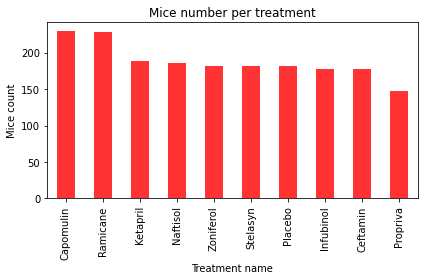

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_count=cleaned_df['Drug Regimen'].value_counts()
bar=mice_count.plot(kind='bar',title='Mice number per treatment',color='r', alpha=0.8)
bar.set_xlabel('Treatment name')
bar.set_ylabel('Mice count')

plt.tight_layout()



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

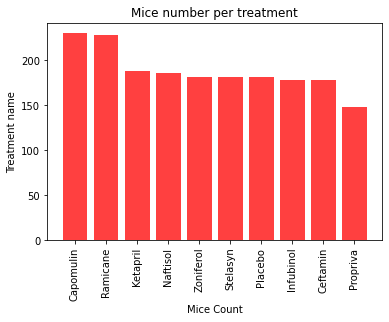

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

mice_count.value=cleaned_df['Drug Regimen'].value_counts()

plt.bar(mice_count.index,mice_count.value,color='r',alpha=0.75)


plt.title('Mice number per treatment')
plt.xlabel('Mice Count')
plt.ylabel('Treatment name')
plt.xticks(rotation='vertical')


<AxesSubplot:title={'center':'Sex ratio'}, ylabel='Sex'>

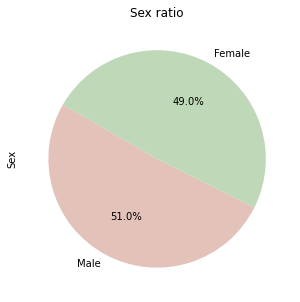

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_distribution=cleaned_df['Sex'].value_counts()
color=['red','blue']
# sex_distribution
sex_distribution.plot(kind='pie', startangle=150, autopct='%1.1f%%', title='Sex ratio',figsize=(5, 5),colors=['#E2C2B9','#BFD8B8'])

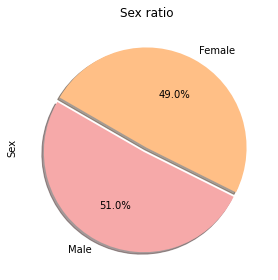

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode=[0.05,0]
labels=[x for x in sex_distribution.index]
sex_distribution2=plt.pie(sex_distribution,labels=labels, explode=explode, colors=['#F6A9A9','#FFBF86'],
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title('Sex ratio')
plt.ylabel('Sex')
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint=cleaned_df.groupby('Mouse ID')['Timepoint'].max()
last_timepoint_df=last_timepoint.to_frame()
# last_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df=last_timepoint_df.merge(cleaned_df, on=('Mouse ID','Timepoint'), how='inner')
new_df

# method 2 for last question
# select_drug_df=new_df.loc[new_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
# select_drug_df
# select_drug_df['Drug Regimen'].value_counts()

# final_tumor_vol=select_drug_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sum()
# final_tumor_vol

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [119]:
# Put treatments into a list for for loop (and later for plot labels)

treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
Capomulin_tumor_vol=[]
Ramicane_tumor_vol=[]
Infubinol_tumor_vol=[]
Ceftamin_tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# quartiles 



    # Locate the rows which contain mice on each drug and get the tumor volumes
for index,row in new_df.iterrows(): 
    if row['Drug Regimen']=='Capomulin':
        Capomulin_tumor_vol.append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen']=='Ramicane':
        Ramicane_tumor_vol.append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen']=='Infubinol':
        Infubinol_tumor_vol.append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen']=='Ceftamin':
        Ceftamin_tumor_vol.append(row['Tumor Volume (mm3)'])
    else:
        pass
    # add subset 
last_tumor_df=pd.DataFrame({
    'Capomulin_tumor_vol':Capomulin_tumor_vol,
    'Ramicane_tumor_vol':Ramicane_tumor_vol,
    'Infubinol_tumor_vol':Infubinol_tumor_vol,
    'Ceftamin_tumor_vol':Ceftamin_tumor_vol
    })   

last_tumor_df   
    # Determine outliers using upper and lower bounds

lowerq_list=[]
upperq_list=[]
IQR_list=[]
lower_bound_list=[]
upper_bound_list=[]
max_list=[]
min_list=[]
median_list=[]

for i in ['Capomulin_tumor_vol','Ramicane_tumor_vol','Infubinol_tumor_vol','Ceftamin_tumor_vol']:
    quartiles=last_tumor_df[i].quantile([0.25,0.5,0.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    IQR=upperq-lowerq
    lowerq_list.append(lowerq)
    upperq_list.append(upperq)
    IQR_list.append(IQR)
    lower_bound_list.append(lowerq - (1.5*IQR))
    upper_bound_list.append(upperq + (1.5*IQR))
    max_list.append(last_tumor_df[i].max())
    min_list.append(last_tumor_df[i].min())
    median_list.append(last_tumor_df[i].median())


quartiles_df=pd.DataFrame({
    'Drug':treatments,
    'lower q':lowerq_list,
    'upper q':upperq_list,
    'IQR':IQR_list,
    'lower_bound':lower_bound_list,
    'upper_bound':upper_bound_list,
    'max':max_list,
    'min':min_list,
    'median':median_list
})

print('There is an outlier for Infubinol treatment group as a the smallest size is 36.321346, lower than lower_bound 36.832905.')

quartiles_df

There is an outlier for Infubinol treatment group as a the smallest size is 36.321346, lower than lower_bound 36.832905.


,Drug,lower q,upper q,IQR,lower_bound,upper_bound,max,min,median
0,Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015,47.685963,23.343598,38.125164
1,Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811,45.220869,22.050126,36.561652
2,Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446,72.226731,36.321346,60.165180
3,Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458,68.923185,45.000000,59.851956


([<matplotlib.axis.XTick at 0x7f8118081520>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

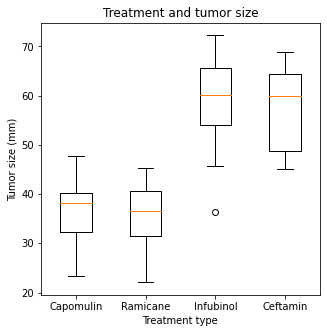

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data=[last_tumor_df['Capomulin_tumor_vol'],last_tumor_df['Ramicane_tumor_vol'],last_tumor_df['Infubinol_tumor_vol'],last_tumor_df['Ceftamin_tumor_vol']]

fig1,axl= plt.subplots(figsize=(5,5))
axl.set_title('Treatment and tumor size')
axl.set_xlabel('Treatment type')
axl.set_ylabel('Tumor size (mm3)')

axl.boxplot(data)
plt.xticks([1,2,3,4],treatments)     

## Line and Scatter Plots

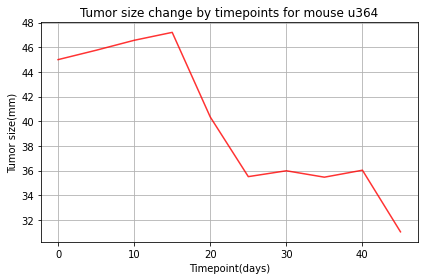

In [63]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

sample_mice=cleaned_df.loc[cleaned_df['Drug Regimen']=='Capomulin']['Mouse ID'].value_counts().sort_values(ascending=False)
# select mouse u364
sample_tumor_data=cleaned_df.loc[cleaned_df['Mouse ID']=='u364']['Tumor Volume (mm3)']
sample_timepoints_data=cleaned_df.loc[cleaned_df['Mouse ID']=='u364']['Timepoint']

plt.plot(sample_timepoints_data,sample_tumor_data,color='red',alpha=0.8)
plt.grid()
plt.title('Tumor size change by timepoints for mouse u364')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor size(mm3)')
plt.tight_layout()

Text(0.5, 1.0, 'Tumor volume and mice weight')

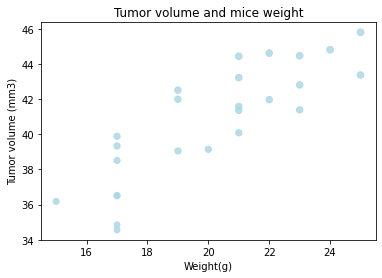

In [98]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


# scatter_data=cleaned_df.loc[cleaned_df['Drug Regimen']=='Capomulin'][['Weight (g)','Tumor Volume (mm3)']]


# plt.scatter(scatter_data['Weight (g)'],scatter_data['Tumor Volume (mm3)'],marker="o", facecolors="#B8DFD8", edgecolors="white",
#             s=scatter_data['Weight (g)'], alpha=0.75)
# plt.figure(figsize=(8, 8))


# method 2
scatter_data=cleaned_df.loc[cleaned_df['Drug Regimen']=='Capomulin']
scatter_new_df=scatter_data.groupby('Mouse ID').mean()
scatter_new_df
plt.scatter(scatter_new_df['Weight (g)'],scatter_new_df['Tumor Volume (mm3)'],marker="o", c='lightblue',
            s=scatter_new_df['Tumor Volume (mm3)'], alpha=0.85)
plt.xlabel('Weight(g)')
plt.ylabel('Tumor volume (mm3)')
plt.title('Tumor volume and mice weight')

## Correlation and Regression

Correlation between Mouse weight and Tumor size is 0.8419363424694716


Text(20, 36, 'y = 0.95x + 21.55')

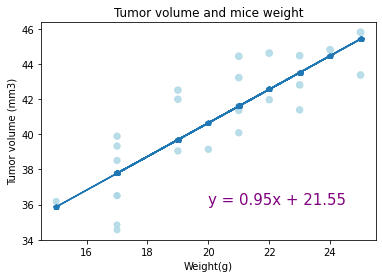

In [117]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

plt.scatter(scatter_new_df['Weight (g)'],scatter_new_df['Tumor Volume (mm3)'],marker="o", c='lightblue',
            s=scatter_new_df['Tumor Volume (mm3)'], alpha=0.85)
plt.xlabel('Weight(g)')
plt.ylabel('Tumor volume (mm3)')
plt.title('Tumor volume and mice weight')

correlation = st.pearsonr(scatter_new_df['Weight (g)'],scatter_new_df['Tumor Volume (mm3)'])[0]
print(f'Correlation between Mouse weight and Tumor size is {correlation}')
x= scatter_new_df['Weight (g)']
y= scatter_new_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq
plt.plot(x,regress_values,"p-")
plt.annotate(line_eq,(20,36),fontsize=15,color="purple")